# Procesamiento de Imagenes

### ¿Cómo se Obtienen los datos?
A continuación, se muestran los datos obtenidos de la galaxia andromeda tomados de:
http://cdsportal.u-strasbg.fr/?target=andromeda

In [2]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np

with fits.open('Data/m31_sdss_obs_flux_attcorr_nomask_r.fit') as hdul:
    hdul.info() 

Filename: Data/m31_sdss_obs_flux_attcorr_nomask_r.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   (2300, 7400)   float32   


### Graficando información cruda

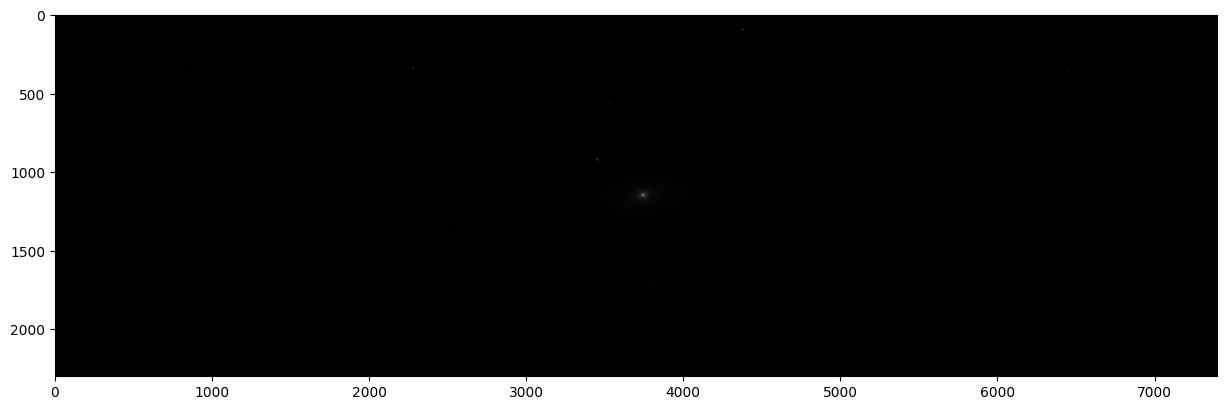

In [17]:
hdul = fits.open('Data/m31_sdss_obs_flux_attcorr_nomask_r.fit')
image_data = hdul[0].data
hdul.close()
plt.figure(figsize=(15,15))
plt.imshow(image_data.T, cmap='gray')
plt.show()

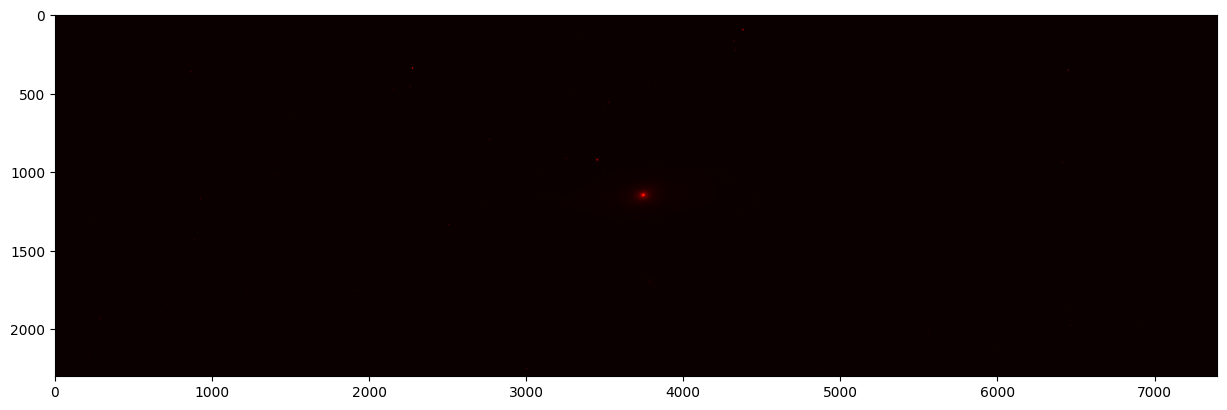

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(image_data.T, cmap='hot')
plt.show()

#### Normalización
Es necesario realizar una normalización de los datos para poder observar mejor las diferencias entre los datos registados.

Se pueden normalizar los datos en escala logaritmica de la forma:

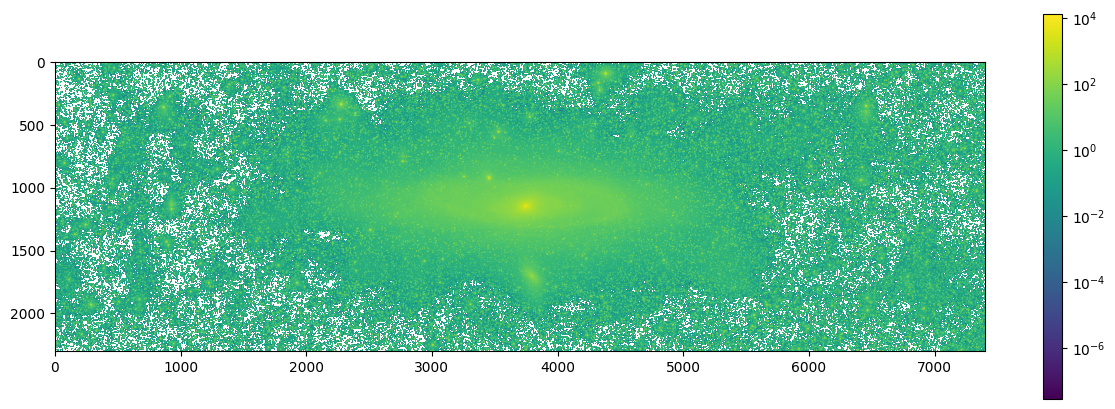

In [40]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,5))
plt.imshow(image_data.T, cmap='viridis', norm=LogNorm())
plt.colorbar()
plt.show()

Se puede evidenciar la presencia de ruido en las imágenes, por lo tanto, es necesario revisar los datos:

In [29]:
image_data

array([[-1.74176410e-01, -3.42591822e-01, -4.47588742e-01, ...,
         1.53360935e-02, -6.94026500e-02, -1.05542384e-01],
       [-8.95968303e-02,  4.16028872e-02, -7.95166865e-02, ...,
         3.08462828e-01, -1.74805447e-02,  3.27246487e-01],
       [-2.74676122e-02,  2.38904372e-01,  3.01361799e-01, ...,
        -6.34999931e-01, -3.53697618e-03,  7.25125074e-01],
       ...,
       [ 3.21048212e+00, -6.62057340e-01, -8.03315733e-03, ...,
         1.25122890e-01, -1.81493089e-01,  9.38122272e-01],
       [ 1.92710519e-01, -7.20745921e-01, -1.34178013e-01, ...,
         3.89773697e-01,  4.43804801e-01,  9.37658027e-02],
       [ 1.95140481e+00, -2.45626569e-02, -3.94979149e-01, ...,
         3.67988892e+01,  1.31365669e+00,  1.60302550e-01]], dtype=float32)

Para evitar los valores negativos, se normaliza restando el valor menor:

In [33]:
image_data_New = image_data - np.min(image_data)

Ya sin el ruido, se puede graficar mejor:

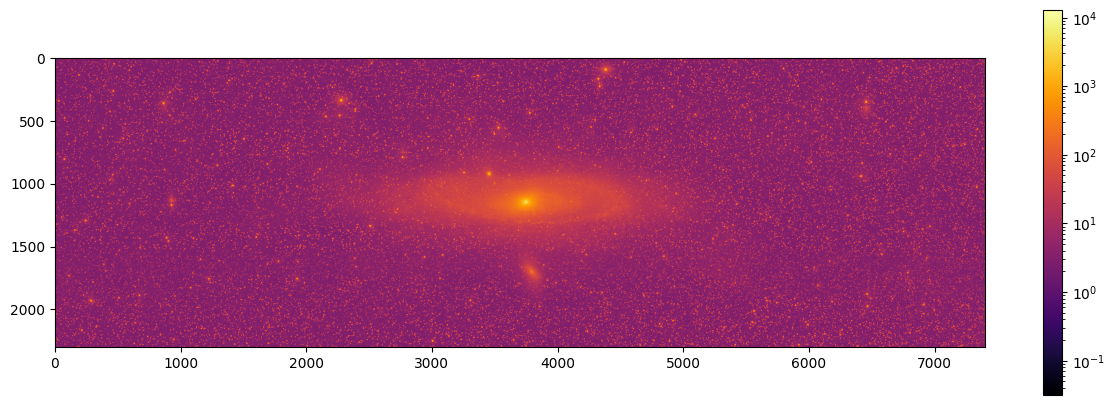

In [37]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,5))
plt.imshow(image_data_New.T, cmap='inferno', norm=LogNorm())
plt.colorbar()
plt.show()